In [3]:
%matplotlib inline
# author: SaKuRa Pop
# data: 2021/4/14 15:06
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split
from FilterNet_utils import Data_set
from bp_kalman_filter import BpFilter, array_to_tensor

# 加载数据 CH4_no_noise_spectral（理想的无噪声光谱）；CH4_noisy_spectral（高斯+干涉噪声光谱）；CH4_KF（noisy spectra经过KF一次优化）

In [4]:
"""模拟数据 （透射谱）"""
no_noise_path = r"D:\PYHTON\python3.7\DeepLearningProgram\深度学习滤波器\1000组模拟数据\提供给模型的数据\模拟数据\CH_nonoise_spectral.npy"
CH4_no_noise_spectral = np.load(no_noise_path)  # (1000, 1111) 透射谱（吸收谱）
noisy_path = r"D:\PYHTON\python3.7\DeepLearningProgram\深度学习滤波器\1000组模拟数据\提供给模型的数据\模拟数据\CH_noisy_spectral.npy"
CH4_noisy_spectral = np.load(noisy_path)  # (1000, 1111) 透射谱（吸收谱）

After_KF_path = r"D:\PYHTON\python3.7\DeepLearningProgram\深度学习滤波器\1000组模拟数据\提供给模型的数据\模拟数据\CH4_afterKF.npy"
CH4_KF = np.load(After_KF_path)

# 加载训练好的BP-KF模型

In [5]:
Gpu = torch.device("cuda")
Bp_kalman = BpFilter().to(Gpu)
model_save_path = r"D:\PYHTON\python3.7\DeepLearningProgram\深度学习滤波器\滤波模型\透射谱的滤波模型\BP_KF.pt"
Bp_kalman.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

# 结果展示

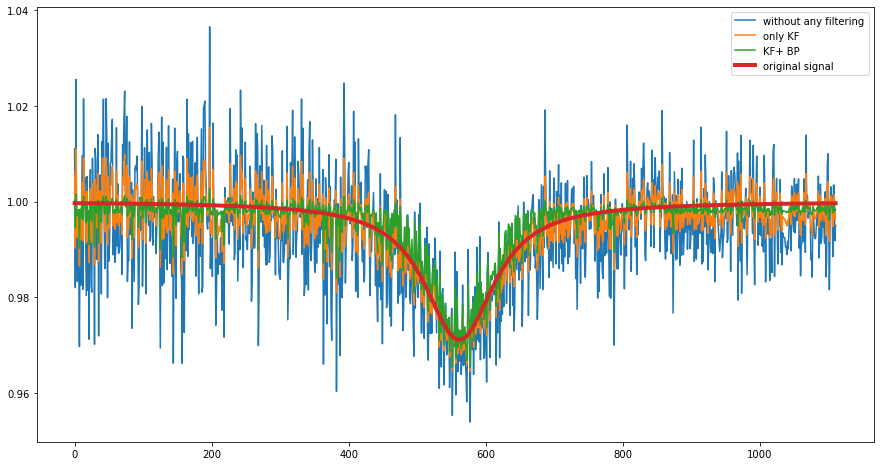

In [6]:
index = 600
test = CH4_KF[index]
test = array_to_tensor(test)
test = test.reshape(1111, 1)
prediction = Bp_kalman(test)
prediction = prediction.cpu().detach().numpy()
test = test.cpu().detach().numpy()
plt.figure(figsize=(15, 8))
plt.plot(CH4_noisy_spectral[index], label="without any filtering")
plt.plot(test, alpha=1, label="only KF")
plt.plot(prediction, alpha=1, label="KF+ BP")
plt.plot(CH4_no_noise_spectral[index], linewidth=4, label="original signal")
plt.legend()
plt.show()